In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Data Collection

In [ ]:
data = pd.read_csv('/content/drive/SriLanka_Weather_Dataset.csv')

# 2. Data Preprocessing

Keep only the selected columns


In [ ]:
data = data[['apparent_temperature_mean', 'rain_sum', 'temperature_2m_mean', 'weathercode']]

Handle missing values if any


In [ ]:
data = data.dropna()

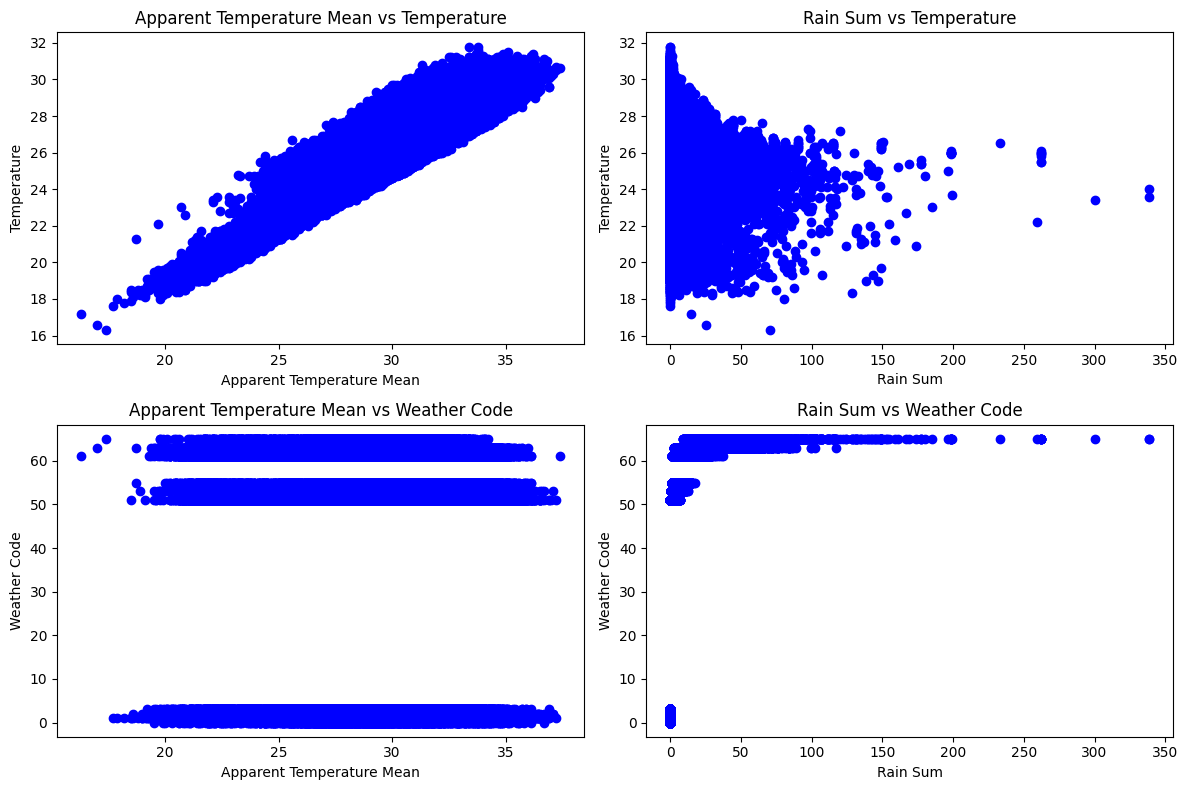

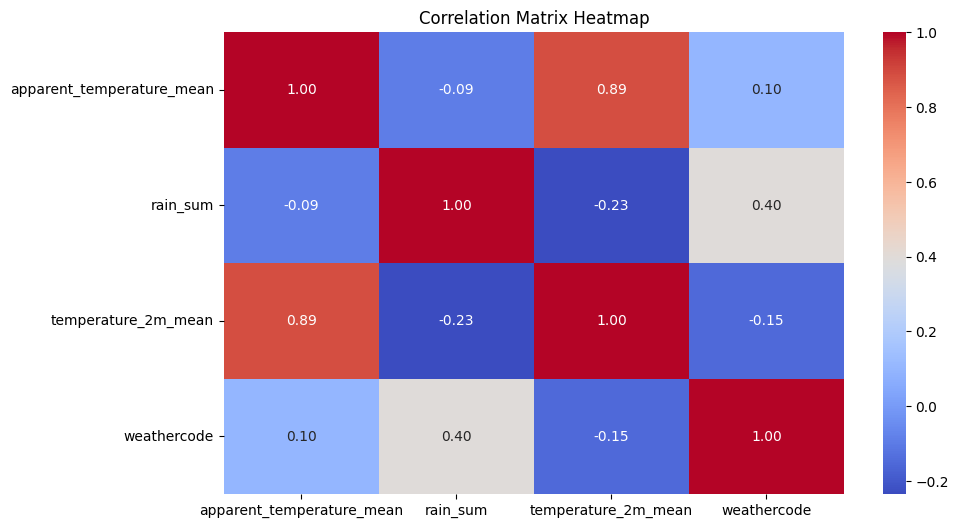

Correlation Matrix:
                           apparent_temperature_mean  rain_sum  \
apparent_temperature_mean                   1.000000 -0.091989   
rain_sum                                   -0.091989  1.000000   
temperature_2m_mean                         0.888324 -0.234696   
weathercode                                 0.099155  0.395169   

                           temperature_2m_mean  weathercode  
apparent_temperature_mean             0.888324     0.099155  
rain_sum                             -0.234696     0.395169  
temperature_2m_mean                   1.000000    -0.150776  
weathercode                          -0.150776     1.000000  


In [ ]:
# 3. Display Data in Scatter Plot
plt.figure(figsize=(12, 8))

# Scatter plot for apparent temperature mean vs temperature
plt.subplot(2, 2, 1)
plt.scatter(data['apparent_temperature_mean'], data['temperature_2m_mean'], color='blue')
plt.xlabel('Apparent Temperature Mean')
plt.ylabel('Temperature')
plt.title('Apparent Temperature Mean vs Temperature')

# Scatter plot for rain sum vs temperature
plt.subplot(2, 2, 2)
plt.scatter(data['rain_sum'], data['temperature_2m_mean'], color='blue')
plt.xlabel('Rain Sum')
plt.ylabel('Temperature')
plt.title('Rain Sum vs Temperature')

# Scatter plot for apparent temperature mean vs weather code
plt.subplot(2, 2, 3)
plt.scatter(data['apparent_temperature_mean'], data['weathercode'], color='blue')
plt.xlabel('Apparent Temperature Mean')
plt.ylabel('Weather Code')
plt.title('Apparent Temperature Mean vs Weather Code')

# Scatter plot for rain sum vs weather code
plt.subplot(2, 2, 4)
plt.scatter(data['rain_sum'], data['weathercode'], color='blue')
plt.xlabel('Rain Sum')
plt.ylabel('Weather Code')
plt.title('Rain Sum vs Weather Code')

# Show the plots
plt.tight_layout()
plt.show()

# 4. Display Heatmap of Correlation Matrix
plt.figure(figsize=(10, 6))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Display Correlation Coefficients
print("Correlation Matrix:")
print(correlation_matrix)

Separate features and target variables

In [ ]:
X = data[['apparent_temperature_mean', 'rain_sum']]  # Features
y_temp = data['temperature_2m_mean']  # Target variable for temperature prediction
y_weathercode = data['weathercode']  # Target variable for weather code prediction
y_rain = data['rain_sum']  # Target variable for rain prediction

Split data into training and testing sets

In [ ]:
X_train, X_test, y_temp_train, y_temp_test = train_test_split(X, y_temp, test_size=0.2, random_state=42)
_, _, y_weathercode_train, y_weathercode_test = train_test_split(X, y_weathercode, test_size=0.2, random_state=42)
_, _, y_rain_train, y_rain_test = train_test_split(X, y_rain, test_size=0.2, random_state=42)

# 3. Choose Models

In [ ]:
temp_model = LinearRegression()
weathercode_model = LinearRegression()
rain_model = LinearRegression()

# 4. Train the Models


In [ ]:
temp_model.fit(X_train, y_temp_train)
weathercode_model.fit(X_train, y_weathercode_train)
rain_model.fit(X_train, y_rain_train)

LinearRegression()

# 5. Evaluate the Models

In [ ]:

y_temp_pred = temp_model.predict(X_test)
temp_mse = mean_squared_error(y_temp_test, y_temp_pred)
print("Temperature Mean Squared Error:", temp_mse)

y_weathercode_pred = weathercode_model.predict(X_test)
weathercode_mse = mean_squared_error(y_weathercode_test, y_weathercode_pred)
print("Weather Code Mean Squared Error:", weathercode_mse)

y_rain_pred = rain_model.predict(X_test)
rain_mse = mean_squared_error(y_rain_test, y_rain_pred)
print("Rain Mean Squared Error:", rain_mse)

Temperature Mean Squared Error: 0.6294819522850056
Weather Code Mean Squared Error: 379.97785175752966
Rain Mean Squared Error: 4.3244541176454146e-29


**Temperature Mean Squared Error: 0.6294819522850056** This indicates that on average, the squared difference between the predicted temperature values and the actual temperature values was 0.6295. A lower MSE generally implies better modeling performance for temperature prediction.

**Weather Code Mean Squared Error: 379.97785175752966**  This refers to the mean squared error for predicting weather codes. Weather codes are categorical variables that represent different weather conditions (e.g., sunny, rainy, snowy). A high MSE in this case suggests that the model might not be very accurate in predicting the specific weather codes.

**Rain Mean Squared Error: 4.3244541176454146e-29**  This is an extremely small value, close to zero. It signifies that the model is very good at predicting rain amounts.

# 6. Save the Models to Files


In [ ]:
joblib.dump(temp_model, 'temperature_model.pkl')
joblib.dump(weathercode_model, 'weathercode_model.pkl')
joblib.dump(rain_model, 'rain_model.pkl')

['rain_model.pkl']

# 7. Load the Models from Files (for future use)

In [ ]:
loaded_temp_model = joblib.load('temperature_model.pkl')
loaded_weathercode_model = joblib.load('weathercode_model.pkl')
loaded_rain_model = joblib.load('rain_model.pkl')

#8. Function to predict with the loaded models

In [ ]:
# Define a dictionary mapping numerical weather codes to their descriptions
weather_code_mapping = {
    0: "Cloud development not observed or observable",
    1: "Clouds dissolving or becoming less developed",
    2: "State of sky on the whole unchanged",
    3: "Clouds generally forming or developing",
    51: "Drizzle, not freezing, continuous (slight at time of observation)",
    53: "Drizzle, not freezing, continuous (moderate at time of observation)",
    55: "Drizzle, not freezing, continuous (heavy at time of observation)",
    61: "Rain, not freezing, continuous (slight at time of observation)",
    63: "Rain, not freezing, continuous (moderate at time of observation)",
    65: "Rain, not freezing, continuous (heavy at time of observation)",
}


In [ ]:
# List of known weather codes
weather_codes = np.array(list(weather_code_mapping.keys()))

In [ ]:
# Function to find the closest weather code
def closest_weather_code(predicted_code):
    index = np.abs(weather_codes - predicted_code).argmin()
    return weather_codes[index]

In [ ]:
# Function to predict with the loaded models
def predict_weather(apparent_temperature_mean, rain_sum):
    # Create a DataFrame for the input features
    input_data = pd.DataFrame({
        'apparent_temperature_mean': [apparent_temperature_mean],
        'rain_sum': [rain_sum]
    })

    # Make predictions using the loaded models
    predicted_temperature = loaded_temp_model.predict(input_data)[0]
    predicted_weathercode = loaded_weathercode_model.predict(input_data)[0]
    predicted_rain = loaded_rain_model.predict(input_data)[0]

    # Find the closest weather code
    closest_code = closest_weather_code(predicted_weathercode)
    predicted_weather_description = weather_code_mapping.get(closest_code, "Unknown weather code")

    # Print the predictions
    print("Predicted Temperature:", predicted_temperature)
    print("Predicted Numerical Weather Code:", predicted_weathercode)
    print("Assigned Weather Code Description:", predicted_weather_description)
    print("Predicted Rain:", predicted_rain)

    return predicted_temperature, closest_code, predicted_rain, predicted_weather_description

# Example usage of the prediction function
apparent_temperature_mean = 38
rain_sum = 5

predicted_temperature, closest_code, predicted_rain, weather_description = predict_weather(apparent_temperature_mean, rain_sum)

Predicted Temperature: 31.119851939504276
Predicted Numerical Weather Code: 54.60256579947055
Assigned Weather Code Description: Drizzle, not freezing, continuous (heavy at time of observation)
Predicted Rain: 5.000000000000002
